<h1 align="center">Volume 4: Spectral 2.</h1>

    Jane Emeline Slagle
    One and done!
    1/25/23

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

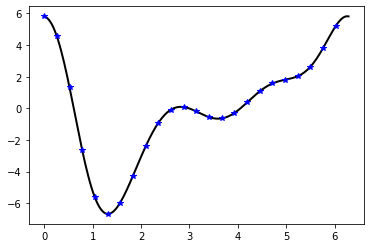

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

/tmp/ipykernel_4857/1923715968.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,our_approx,'-k',linewidth=2., color = "lightpink")


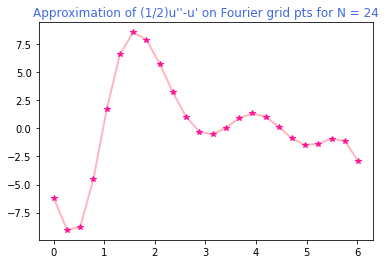

In [3]:
#sample code finds 1st deriv, we want 2nd deriv approx so copy, paste sample code, then find 2nd deriv

N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)            #this is eq 15.3 in lab manual
fp_hat = ((1j*k)*f_hat)   #this is eq 15.4 in lab manual: this is where actually take the deriv., 1j is i in lab manual
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically, get 1st deriv approx from this sample code!
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

#now get 2nd deriv approx:
#want take deriv of fp_hat on line 13, take deriv like eq 15.4, have same form as eq 15.4 so taking deriv of np.exp
#so just need to multiply fp_hat by ik, i in python is 1j so multiply by 1jk
fpp_hat = (1j*k)*fp_hat
fpp = np.real(ifft(fpp_hat))  

#now plot (1/2)u''-u':
our_approx = (1/2)*fpp - fp

plt.title("Approximation of (1/2)u''-u' on Fourier grid pts for N = 24", color = "royalblue")
plt.plot(x1,our_approx,'-k',linewidth=2., color = "lightpink")
plt.plot(x1,our_approx, '*', color = "deeppink")
plt.show()

# Problem 2 - setup

In [4]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

#code that Quinlan gave us on slack YAHOO:
def RK4(f, x0,xf, y0, n):
    """
    Uses the Runge-Kutta 4 method to solve the IVP
        y' = f(x, y)
        y(0)=y0
    Arguments:
        f - RHS of ode
        x0, xf - initial and final x values to be evaluated at
        y0 - initial value
        n - number of points
    Returns:
        x, y - arrays of x and y values at every point of solution
    """
    #Create arrays for x and y values
    x, h = np.linspace(x0, xf, n, retstep=True)
    
    if np.isscalar(y0):
        y = np.zeros(n)
        y[0] = y0
    else:
        y = np.zeros((n, y0.shape[0]))
        y[0] = y0
    
    for i in range(n-1):
        K1 = f(x[i], y[i])
        K2 = f(x[i]+h/2, y[i]+h/2*K1)
        K3 = f(x[i]+h/2, y[i]+h/2*K2)
        K4 = f(x[i+1], y[i]+h*K3)
        y[i+1] = y[i] + h/6*(K1+2*K2+2*K3+K4)
    return x, y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

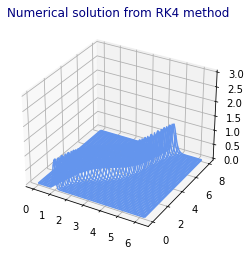

In [6]:
#in this problem: solving for u_t in u_t+cu_x = 0 equation
t_steps = 150 # Time steps
x_steps = 100 # x steps
N = 100       #N needs to be the same size as N

#your code here to set things up:

#define the c func and u func:
c = lambda x: .2 + (np.sin(x-1))**2  #c is actually a constant here, not a func of x but whatevs
u = lambda x: np.exp(-100*(x-1)**2)

#define the t and x domains:
t = np.linspace(0, 8, t_steps)
x = np.linspace(0, 2*np.pi, x_steps)

#define the f that plug into RK4 func:
#1st need k to make f func:
k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))
f = lambda t, u: -c(x)*np.real(ifft(1j*k*fft(u)))  #f is defined as: f=-c*F^-1(ik*F(u))

#now plug all into RK4 method. Should return a t_steps by x_steps array
y0 = u(x)   #y0 = u(x,t=0)
sol = RK4(f, 0, 8, y0, t_steps)[1]  #x is actually t in RK4 function

#plot it now!
X,Y = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol, color = "cornflowerblue")
plt.title("Numerical solution from RK4 method", color = "navy")
ax.set_zlim(0,3)
plt.show()